# [Image Super Resolution](https://github.com/idealo/image-super-resolution)

---


The process will be:

**1. Start from a low resolution images**

**2. Increase their resolution with "Image Super Resolution" - [ISR](https://github.com/idealo/image-super-resolution) project**

**3. Compare the results with the original ones**

---

## What is exactly Image Super Resolution project?

![ISR Image](https://idealo.github.io/image-super-resolution/figures/butterfly.png)

**From their website:**

The goal of this project is to upscale and improve the quality of low resolution images.

This project contains Keras implementations of different Residual Dense Networks for Single Image Super-Resolution (ISR) as well as scripts to train these networks using content and adversarial loss components.

The implemented networks include:

- The super-scaling Residual Dense Network described in [Residual Dense Network for Image Super-Resolution](https://arxiv.org/abs/1802.08797) (Zhang et al. 2018)
- The super-scaling Residual in Residual Dense Network described in [ESRGAN: Enhanced Super-Resolution Generative Adversarial Networks](https://arxiv.org/abs/1809.00219) (Wang et al. 2018)
- A multi-output version of the Keras VGG19 network for deep features extraction used in the perceptual loss
- A custom discriminator network based on the one described in [Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network](https://arxiv.org/abs/1609.04802) (SRGANS, Ledig et al. 2017)

Read the full documentation at: https://idealo.github.io/image-super-resolution/.

Docker scripts and Google Colab notebooks are available to carry training and prediction. Also, we provide scripts to facilitate training on the cloud with AWS and nvidia-docker with only a few commands.

ISR is compatible with Python 3.6 and is distributed under the Apache 2.0 license. We welcome any kind of contribution. If you wish to contribute, please see the Contribute section.

![Arch](https://idealo.github.io/image-super-resolution/figures/RRDN.jpg)

---

_NOTE:_

I Discovered this project following [Dat Tran](https://www.linkedin.com/in/dat-tran-a1602320/) on LinkedIn, you can always learn from his posts.

He and his team realized this amazing open source project that can be applied to many domains!

Here is the full team:

**Francesco Cardinale**, github: [cfrancesco](https://github.com/cfrancesco)

**Zubin John**, github: [valiantone](https://github.com/valiantone)

**Dat Tran**, github: [datitran](https://github.com/datitran)

In [1]:
# libraries
import numpy as np
import pandas as pd
import os

import cv2
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
# Firstly, We are going so resize the images to Low Resolution.. Let's say 200x200
im_size = 200

# Then, we apply ISR and see the results

# Image Sample

Original Size: 1050, 1050


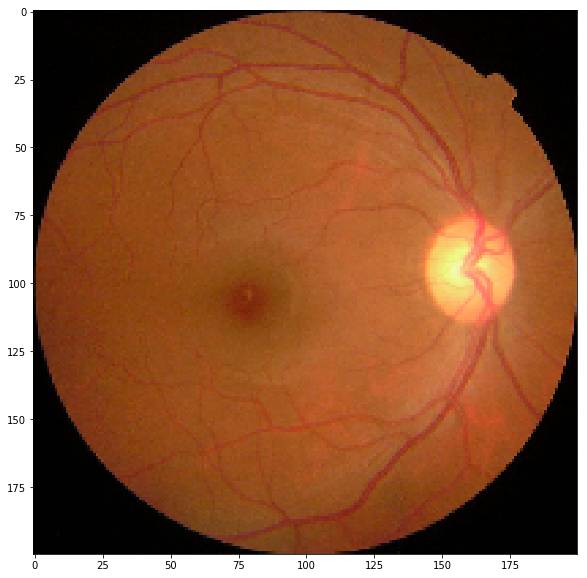

In [3]:
# I'm going to take just 2 images (new and old competition) and work on them

new_path = f"../d7bc00091cfc.png"
new_image = cv2.imread(new_path)
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
h, w, c = new_image.shape
print('Original Size: {}, {}'.format(w, h))
new_image = cv2.resize(new_image, (im_size,im_size))

fig = plt.figure(figsize=(10,10))
plt.imshow(new_image)

Original Size: 1024, 768


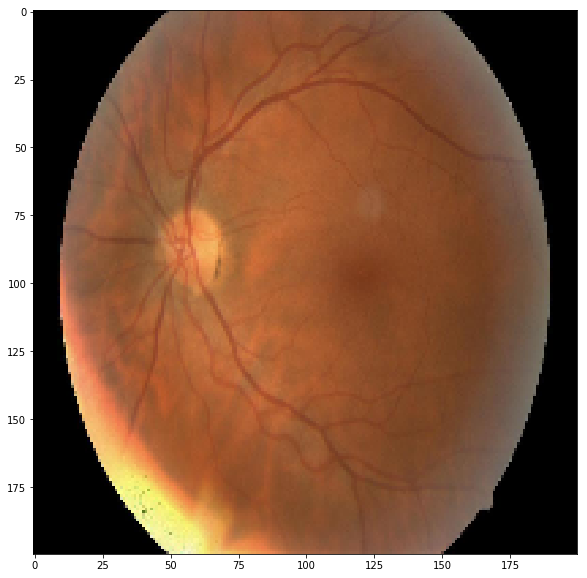

In [4]:
old_path = f"../22_left.jpeg"
old_image = cv2.imread(old_path)
old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2RGB)
h, w, c = old_image.shape
print('Original Size: {}, {}'.format(w, h))
old_image = cv2.resize(old_image, (im_size,im_size))

fig = plt.figure(figsize=(10,10))
plt.imshow(old_image)

# Install ISR

In [5]:
!pip install ISR

     |████████████████████████████████| 92.5MB 464kB/s 
     |████████████████████████████████| 17.3MB 25.1MB/s 
     |████████████████████████████████| 3.2MB 8.9MB/s 
     |████████████████████████████████| 368kB 33.7MB/s 
ERROR: allennlp 0.8.4 requires awscli>=1.11.91, which is not installed.
ERROR: allennlp 0.8.4 requires flaky, which is not installed.
ERROR: allennlp 0.8.4 requires responses>=0.7, which is not installed.
ERROR: mxnet-cu100 1.4.1 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.16.2 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.5.0 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.16.2 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement scikit-learn<0.21,>=0.19.0, but you'll have scikit-learn 0.21.2 which is incompatible.
ERROR: ethnicolr 0.2.1 has requirement tensorflow==1.12.3, but you'll have tenso

In [6]:
!wget https://github.com/idealo/image-super-resolution/raw/master/weights/sample_weights/rdn-C6-D20-G64-G064-x2/ArtefactCancelling/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5
!wget https://github.com/idealo/image-super-resolution/raw/master/weights/sample_weights/rdn-C6-D20-G64-G064-x2/PSNR-driven/rdn-C6-D20-G64-G064-x2_PSNR_epoch086.hdf5
!wget https://github.com/idealo/image-super-resolution/raw/master/weights/sample_weights/rdn-C3-D10-G64-G064-x2/PSNR-driven/rdn-C3-D10-G64-G064-x2_PSNR_epoch134.hdf5
!mkdir weights
!mv *.hdf5 weights

--2019-07-11 10:18:06--  https://github.com/idealo/image-super-resolution/raw/master/weights/sample_weights/rdn-C6-D20-G64-G064-x2/ArtefactCancelling/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rdn-C6-D20-G64-G064-x2/ArtefactCancelling/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5 [following]
--2019-07-11 10:18:06--  https://media.githubusercontent.com/media/idealo/image-super-resolution/master/weights/sample_weights/rdn-C6-D20-G64-G064-x2/ArtefactCancelling/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githu

In [7]:
# import model
from ISR.models import RDN

Using TensorFlow backend.


In [8]:
%%time
rdn = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':2})
rdn.model.load_weights('weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')

CPU times: user 4.4 s, sys: 240 ms, total: 4.64 s
Wall time: 4.53 s


In [9]:
%%time
new_image_isr = rdn.predict(np.asarray(new_image))
old_image_isr = rdn.predict(np.asarray(old_image))

CPU times: user 2min 7s, sys: 20 s, total: 2min 27s
Wall time: 1min 16s


In [10]:
# This is to compare to the images created with ISR so we can better see differences
old_image = cv2.resize(old_image,(im_size*2,im_size*2))
new_image = cv2.resize(new_image,(im_size*2,im_size*2))

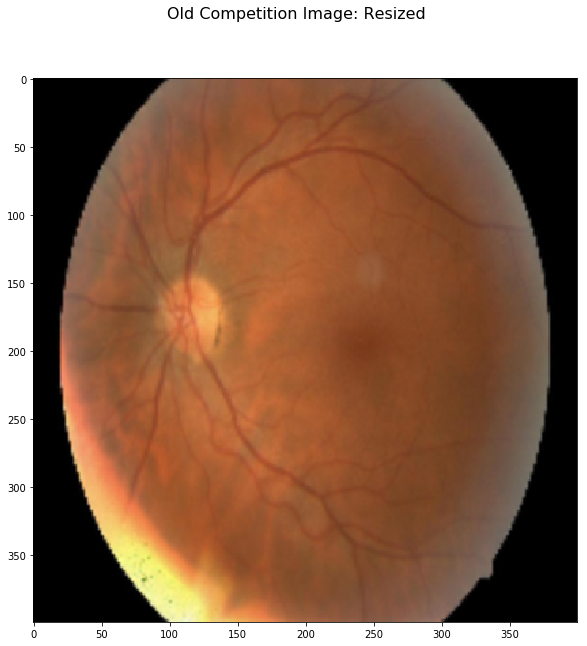

In [11]:
f = plt.figure(figsize=(10,10))
f.suptitle("Old Competition Image: Resized", fontsize=16)
plt.imshow(old_image)
plt.show()

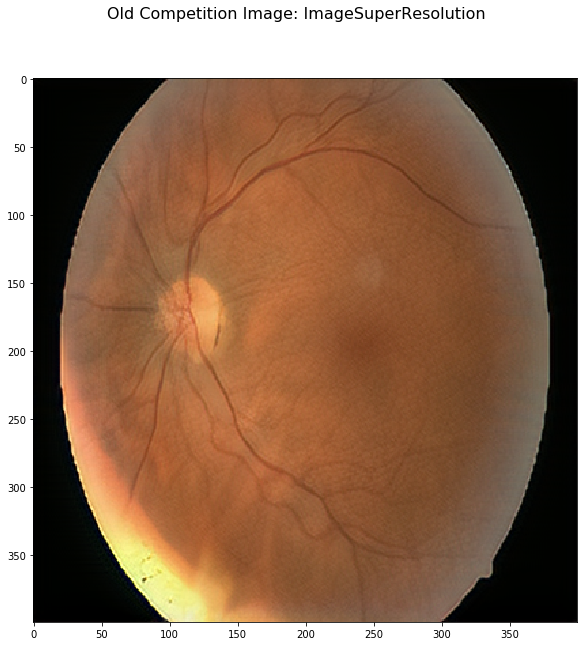

In [12]:
f = plt.figure(figsize=(10,10))
f.suptitle("Old Competition Image: ImageSuperResolution", fontsize=16)
plt.imshow(old_image_isr)
plt.show()

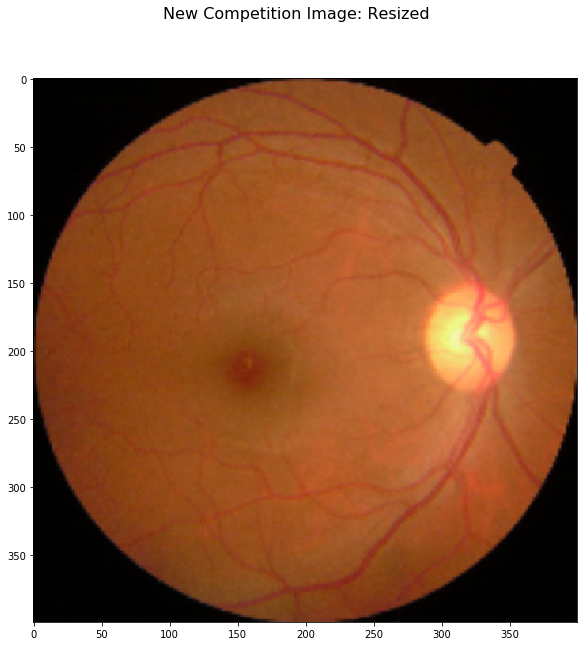

In [13]:
f = plt.figure(figsize=(10,10))
f.suptitle("New Competition Image: Resized", fontsize=16)
plt.imshow(new_image)
plt.show()

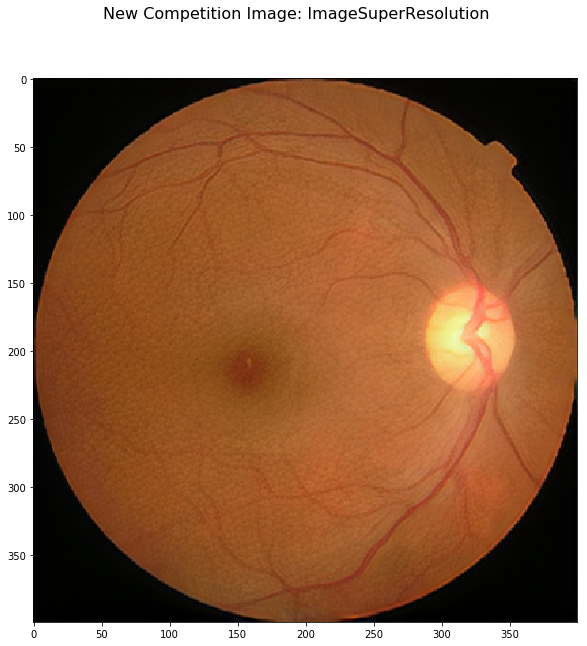

In [14]:
f = plt.figure(figsize=(10,10))
f.suptitle("New Competition Image: ImageSuperResolution", fontsize=16)
plt.imshow(new_image_isr)
plt.show()

# Conclusions

We can easily notice the differences between the processed images and the resized ones.
For instance, the outlines and veins details improved significantly!

What do you think? Could it be useful for hospitals and labs to save in super expensive machinery?

I would love to discuss further in comments

---

**If you enjoyed the kernel, please consider upvoting it.  xD **